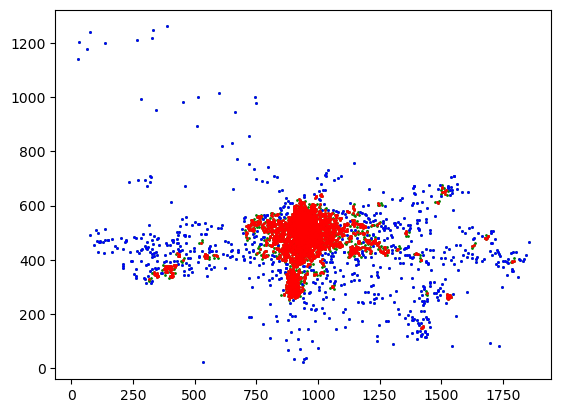

In [19]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

dir_list = os.listdir('Primary Care Calibration\\Manually Validated Participants')
calList = pandas.read_excel('Primary Care Calibration\\Manually Validated Participants\\Calibration List.xlsx').to_numpy()

inds = np.zeros(len(dir_list)-1)
for i in range(len(dir_list)-1):
    if calList[i, 1]=='Good':
        inds[i] = 1

data = pandas.read_csv('Primary Care Calibration\\Manually Validated Participants\\' + str(dir_list[1])).to_numpy()

for l in range(len(data[:, 0])):
    if data[l, 4]<0 or data[l, 5]<0:
        data[l, 3] = 0
    else:
        if l != 0 and data[l, 4] == data[l-1, 4]:
            data[l, 3] = 0

validData = np.zeros(shape=(int(sum(data[:, 3])), 6))

j = 0
for k in range(len(data[:, 0])):
    if data[k, 3] == 1:
        validData[j, :] = data[k, :]
        j= j + 1

clustering = DBSCAN(eps=10, min_samples=4).fit(validData[:, 4:])

plt.plot(validData[:, 4], validData[:, 5], 'o', markersize=1, color='g')
for i in range(len(clustering.labels_)):
    if clustering.labels_[i]==-1:
        plt.plot(validData[i, 4], validData[i, 5], 'o', markersize=1, color='b')
for j in range(len(clustering.core_sample_indices_)):
    plt.plot(validData[clustering.core_sample_indices_[j], 4], validData[clustering.core_sample_indices_[j], 5], 'o', markersize=1, color='r')

plt.show()